In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import subprocess
from math import e, pi

In [3]:
plt.style.use('default_colors.mplstyle')

In [4]:
import clifford as cf

In [5]:
layout, blades = cf.Cl(2) #Создаем 2-мерную алгебру Клиффорда
locals().update(blades) #Обновляем базис

In [6]:
# укажем директорию, в которую будем сохранять сгенерированные картинки
FOLDER = 'geom_2'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

In [7]:
O = np.array([0, 0])
width = 0.01
arrow_params = dict(width=width,
                    length_includes_head=True,
                    head_width=10*width,
                    zorder=4)

In [8]:
i = e1 ^ e2

In [9]:
def f(t):
    return np.exp(0.5*pi*(-t)*i)

In [10]:
def d(t):
    return 3*(np.exp(0.5*pi*t*i))

In [11]:
def k(t):
    return 0.25*((np.exp(0.5*pi*(-t)*i))-3*(np.exp(0.5*pi*t*i)))*np.sin(((2*np.pi*θ)/10)+(4*np.pi*θ))

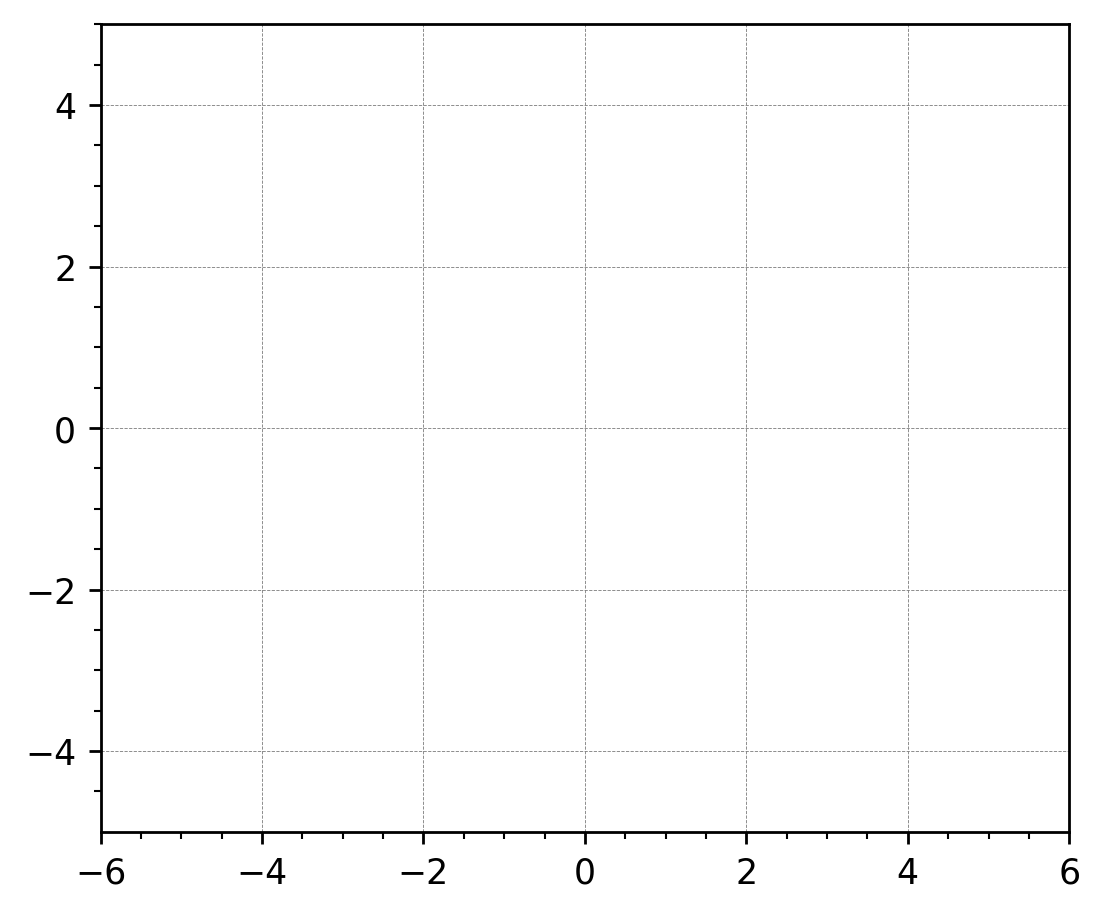

In [12]:
fig01 = plt.figure(num=1, figsize=(5, 5))
ax01 = fig01.add_subplot(1, 1, 1)

ax01.set_aspect('equal')
ax01.set_xlim(left=-6, right=6)
ax01.set_ylim(bottom=-5, top=5)

θ = np.linspace(0, 8*np.pi, 1000)

p2 = f(θ)
p3 = d(θ)
p1 = k(θ)

p113 = np.array([p.as_array()[0] for p in p1+p2])
p123 = np.array([p.as_array()[3] for p in p1+p2])

p_x = np.array([p.as_array()[0] for p in p1+p2+p3])
p_y = np.array([p.as_array()[3] for p in p1+p2+p3])
for n in range(θ.size):
    ax01.plot(p_x[:n],p_y[:n], color='green')
    ax01.arrow(*O, p1[n].as_array()[0], p1[n].as_array()[3], color='red', **arrow_params)
    ax01.arrow(p1[n].as_array()[0], p1[n].as_array()[3], p2[n].as_array()[0], p2[n].as_array()[3], color='green', **arrow_params)
    ax01.arrow(p113[n], p123[n], p3[n].as_array()[0], p3[n].as_array()[3], color='blue', **arrow_params)
    fig01.savefig(f'{FOLDER}/{n:03d}.png', dpi=300, format='png')
    
    #Очищаем от линий и стрелок
    del ax01.lines[:]
    del ax01.patches[:]

In [13]:
FFMPEG = 'ffmpeg.exe'

CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', f'{FOLDER}/%03d.png',
'-vcodec', 'h264', '-crf', '25', '-pix_fmt', 'yuv420p', 'geom_2.mp4']
print(' '.join(CMD))
out = subprocess.run(CMD, capture_output=True)
print(out.stderr.decode('utf-8'))

ffmpeg.exe -y -r 30 -f image2 -i geom_2/%03d.png -vcodec h264 -crf 25 -pix_fmt yuv420p geom_2.mp4
ffmpeg version n5.0-4-g911d7f167c-20220325 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 11.2.0 (crosstool-NG 1.24.0.533_681aaef)
  configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw32 --enable-version3 --disable-debug --enable-shared --disable-static --disable-w32threads --enable-pthreads --enable-iconv --enable-libxml2 --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-lzma --enable-fontconfig --enable-libvorbis --enable-opencl --disable-libpulse --enable-libvmaf --disable-libxcb --disable-xlib --enable-amf --enable-libaom --disable-avisynth --enable-libdav1d --disable-libdavs2 --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --disable-frei0r --enable-libgme --enable-libass --enable-libbluray --enable-libmp3lame --enable-libopus 